In [1]:
from IPython.display import HTML
import importlib as imp
import cf
imp.reload(cf)
from cf import *
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
TEST The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Homework 2
## Mike Henry

### Questions 1-6

|  Co % |  102 d-spacing Å | 110 d-spacing Å  | a lattice parameter Å  | c lattice parameter Å  | Particle Size (nm)  |
|---    |---               |---               |---                     |---                     |---                  |
|  0    | 1.9098           | 1.6239           | 3.2478                 | 5.2026                 | 28.9831             |
|  2    | 1.9084           | 1.6229           | 3.2458                 | 5.1985                 | 29.6166             |
|  3    | 1.9066           | 1.6217           | 3.2434                 | 5.1927                 | 30.0014             |
|  4    | 1.9096           | 1.6238           | 3.2476                 | 5.2021                 | 26.6849             |
|  12   | 1.9133           | 1.6226           | 3.2520                 | 5.2242                 | 14.0476             |

#### d-spacing
We can calculate the d-spacing by

In [299]:
%%latex
\begin{align}
&2d\sin(\theta)=n\lambda \\
&d=\frac{n\lambda}{2\sin(\theta)}
\end{align}
Now we let $n=1$ and $\lambda = 1.5406Å$
From our peak fitting (see below), we know that $\theta = 47.75$ but recall that this is $2\theta$ so we must divide by 2,
hence,
\begin{align}
&\theta = \frac{47.75}{2}\\
&\frac{1.5406Å}{2\sin(23.787)}=1.9098Å 
\end{align}
This example was done from data on the $d_{102}$ plane.
We can then repeat this process to calculate the d spacing for all of the other peaks.

<IPython.core.display.Latex object>

#### Curve Fits
In the curve fits below, the black line represents the fit. Also note that the area considered for the fit is equal to the size of the black curve.

Curve fit for the 102 peak of Co doped with 0% ZnO:
Function:
B + B_s * x + I_p * (whm**2/(whm**2+(x-x0)**2))
B 39.0617315593
Bs -0.347964203678
Ip 2631.39770949
whm 0.141249378095
x0 47.5745572592
Correlation : 0.995315993542
RMSE 25.7867812702


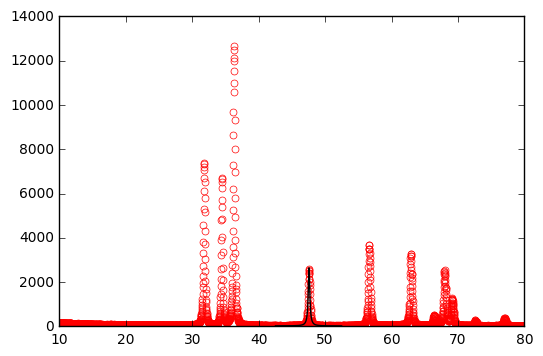

In [300]:
%matplotlib inline
if __name__ == "__main__":
    x_r, y_r = load_data('Co_ZnO_0%.csv')
    # Guess array
    p0 = sy.array([0, 0, 1000, .1, 47.5])
    delta = 5
    peak_loc = p0[-1]
    x, y = data_slice(delta, peak_loc, x_r, y_r)
    popt, pcov = curve_fit(func, x, y, p0)
    y_fit = func(x, *popt)
    print("Curve fit for the 102 peak of Co doped with 0% ZnO:")
    print("Function:")
    print("B + B_s * x + I_p * (whm**2/(whm**2+(x-x0)**2))")
    print("B" ,popt[0])
    print("Bs", popt[1])
    print("Ip", popt[2])
    print("whm", popt[3])
    print("x0", popt[4])
    ss_res = np.dot((y - y_fit), (y - y_fit))
    ymean = np.mean(y)
    ss_tot = np.dot((y-ymean),(y-ymean))
    print("Correlation :",  1-ss_res/ss_tot)
    residuals = y - y_fit
    print("RMSE",(sy.sum(residuals**2)/(residuals.size-2))**0.5)
    plt.plot(x_r, y_r, markerfacecolor='none', marker='o', color='r', linewidth=0.0,  fillstyle="none", markeredgewidth = 0.5, markersize = 5)
    plt.plot(x, y_fit, color='black', linewidth=1)
    plt.show()

Curve fit for the 110 peak of Co doped with 0% ZnO:
Function:
B + B_s * x + I_p * (whm**2/(whm**2+(x-x0)**2))
B 6.27206643993
Bs 0.238666453558
Ip 3773.1904717
whm 0.155902830275
x0 56.6334614674
Correlation : 0.993651826126
RMSE 45.056088759


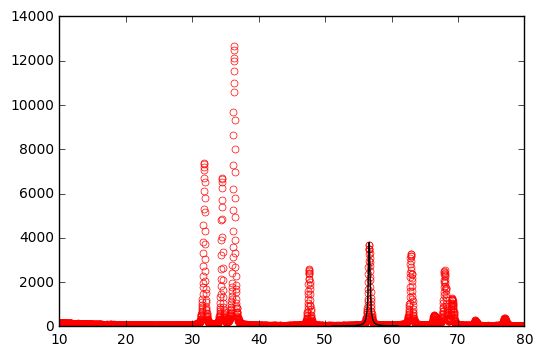

In [301]:
%matplotlib inline


if __name__ == "__main__":
    x_r, y_r = load_data('Co_ZnO_0%.csv')

    # Guess array
    p0 = sy.array([0, 0, 1000, .1, 56])
    delta = 5
    peak_loc = p0[-1]
    x, y = data_slice(delta, peak_loc, x_r, y_r)
    popt, pcov = curve_fit(func, x, y, p0)
    y_fit = func(x, *popt)
    print("Curve fit for the 110 peak of Co dopped with 0% ZnO:")
    print("Function:")
    print("B + B_s * x + I_p * (whm**2/(whm**2+(x-x0)**2))")
    print("B" ,popt[0])
    print("Bs", popt[1])
    print("Ip", popt[2])
    print("whm", popt[3])
    print("x0", popt[4])
    ss_res = np.dot((y - y_fit), (y - y_fit))
    ymean = np.mean(y)
    ss_tot = np.dot((y-ymean),(y-ymean))
    print("Correlation :",  1-ss_res/ss_tot)
    residuals = y - y_fit
    print("RMSE",(sy.sum(residuals**2)/(residuals.size-2))**0.5)
    plt.plot(x_r, y_r, markerfacecolor='none', marker='o', color='r', linewidth=0.0,  fillstyle="none", markeredgewidth = 0.5, markersize = 5)
    plt.plot(x, y_fit, color='black', linewidth=1)
    plt.show()

#### Particle Size
Using the Scherrer Relation we can calculate the particle size

In [302]:
%%latex
\begin{equation}
L = \frac{0.9*\lambda}{B \cos(\theta)}
\end{equation}
With $\lambda$ the X-ray wavelength, B, the full-width at half maximum, and $\theta$, the diffraction angle.
We must be careful to convert from degrees to radians to use the Scherrer Relation. We must also note that we calculate
the half width at half maximum and not the full width.
\begin{align}
&\lambda = 1.5406Å \\
&B = 0.1559 * 2 * \frac{\pi}{180} = 0.0054 rad \\
&\theta = 28.316 * \frac{\pi}{180} = 0.4942 rad \\
&L = \frac{0.9 * 1.5406Å}{0.0054 rad * \cos(0.4942)} \\
&L = 28.9397 nm
\end{align}
This example was done on the 0% Co ZnO doped sample. The same method was repeated for the other samples.

<IPython.core.display.Latex object>

#### Lattice Parameters
Since Co-ZnO is a hexagonal crystal system we can use the following equation to calculate lattice parameters:

In [303]:
%%latex
\begin{align}
&\frac{1}{d_{hkl}^2}=\frac{4}{3}\frac{h^2+h*k+k^2}{a^2}+\frac{l^2}{c^2}
\end{align}
In the $d_{110}$ case, our equation becomes:
\begin{align}
&\frac{1}{d_{110}^2}=\frac{4}{3}\frac{1^2+1*1+1^2}{a^2}+\frac{0^2}{c^2} \\
&\frac{1}{d_{110}^2}=\frac{4}{a^2} \\
&a = 2*d_{110}
\end{align}
We can now use this result on the d_{102} case to get an expression for the c lattice parameter:
\begin{align}
&\frac{1}{d_{102}^2}=\frac{4}{3}\frac{1^2+1*0+0^2}{4*d_{110}^2}+\frac{2^2}{c^2} \\
&\frac{1}{d_{102}^2}=\frac{4}{3}\frac{1}{4*d_{110}^2}+\frac{4}{c^2} \\
&\frac{1}{d_{102}^2}=\frac{1}{3*d_{110}^2}+\frac{4}{c^2} \\
&\frac{4}{c^2} = \frac{1}{3*d_{110}^2} - \frac{1}{d_{102}^2} \\
&c = \left(\frac{4}{\frac{1}{3*d_{110}^2}-\frac{1}{d_{102}^2}}\right)^\frac{1}{2}
\end{align}
For the 0\% Co ZnO example we have:
\begin{align}
&a = 2*d_{110} \\
&a = 2*1.6239Å = 3.2478Å \\
&\text{and} \\
&c = \left(\frac{4}{\frac{1}{3*d_{110}^2}-\frac{1}{d_{102}^2}}\right)^\frac{1}{2} \\
&c = \left(\frac{4}{\frac{1}{3*1.6239Å^2}-\frac{1}{1.9098Å^2}}\right)^\frac{1}{2} = 5.2028Å
\end{align}
We can use the above procedure for the rest of the samples.

<IPython.core.display.Latex object>

Adding Co to ZnO shows a general increase in lattice size. Since Co is smaller than Zn, the Co isn't replacing the Zn. Instead, the Co is filling interstitial sites, causing the lattice to increase in size.

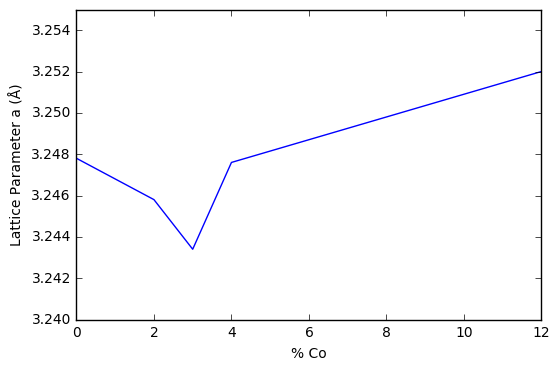

In [304]:
%matplotlib inline
plt.plot([0,2,3,4,12], [3.2478,3.2458,3.2434,3.2476,3.2520])
plt.xlabel("% Co")
plt.ylabel("Lattice Parameter a (Å)")
plt.ylim(3.240,3.255)
plt.show()



### Question 7


Curve fit for the 440 peak of Mn doped with 3% ITO:
Function:
B + B_s * x + I_p * (whm**2/(whm**2+(x-x0)**2))
B 78.2265133726
Bs -0.670719891717
Ip 50.4273194159
whm 0.261100655074
x0 51.7259099168
Correlation : 0.612475380955
RMSE 7.49648509845


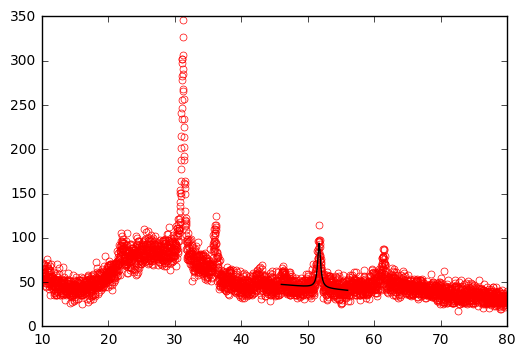

In [305]:
%matplotlib inline


if __name__ == "__main__":
    x_r, y_r = load_data('Mn_ITO_3%25.csv')

    # Guess array
    p0 = sy.array([0, 0, 100, 1, 51.03])
    delta = 5
    peak_loc = p0[-1]
    x, y = data_slice(delta, peak_loc, x_r, y_r)
    popt, pcov = curve_fit(func, x, y, p0)
    y_fit = func(x, *popt)
    print("Curve fit for the 440 peak of Mn doped with 3% ITO:")
    print("Function:")
    print("B + B_s * x + I_p * (whm**2/(whm**2+(x-x0)**2))")
    print("B" ,popt[0])
    print("Bs", popt[1])
    print("Ip", popt[2])
    print("whm", popt[3])
    print("x0", popt[4])
    ss_res = np.dot((y - y_fit), (y - y_fit))
    ymean = np.mean(y)
    ss_tot = np.dot((y-ymean),(y-ymean))
    print("Correlation :",  1-ss_res/ss_tot)
    residuals = y - y_fit
    print("RMSE",(sy.sum(residuals**2)/(residuals.size-2))**0.5)
    plt.plot(x_r, y_r, markerfacecolor='none', marker='o', color='r', linewidth=0.0,  fillstyle="none", markeredgewidth = 0.5, markersize = 5)
    plt.plot(x, y_fit, color='black', linewidth=1)
    plt.show()

Curve fit for the 622 peak of Mn doped with 3% ITO:
Function:
B + B_s * x + I_p * (whm**2/(whm**2+(x-x0)**2))
B 45.4205659215
Bs 0.00206617139974
Ip 31.4153242123
whm 0.291101158455
x0 61.3730877756
Correlation : 0.455268307995
RMSE 6.7091971071


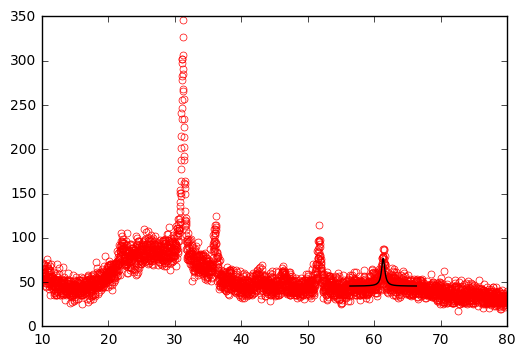

In [306]:
%matplotlib inline


if __name__ == "__main__":
    x_r, y_r = load_data('Mn_ITO_3%25.csv')

    # Guess array
    p0 = sy.array([46, -1, 100, 1, 61.37])
    delta = 5
    peak_loc = p0[-1]
    x, y = data_slice(delta, peak_loc, x_r, y_r)
    popt, pcov = curve_fit(func, x, y, p0)
    y_fit = func(x, *popt)
    print("Curve fit for the 622 peak of Mn doped with 3% ITO:")
    print("Function:")
    print("B + B_s * x + I_p * (whm**2/(whm**2+(x-x0)**2))")
    print("B" ,popt[0])
    print("Bs", popt[1])
    print("Ip", popt[2])
    print("whm", popt[3])
    print("x0", popt[4])
    ss_res = np.dot((y - y_fit), (y - y_fit))
    ymean = np.mean(y)
    ss_tot = np.dot((y-ymean),(y-ymean))
    print("Correlation :",  1-ss_res/ss_tot)
    residuals = y - y_fit
    print("RMSE",(sy.sum(residuals**2)/(residuals.size-2))**0.5)
    plt.plot(x_r, y_r, markerfacecolor='none', marker='o', color='r', linewidth=0.0,  fillstyle="none", markeredgewidth = 0.5, markersize = 5)
    plt.plot(x, y_fit, color='black', linewidth=1)
    plt.show()

### Questions 7 & 8

In [307]:
%%latex

Using the same method above and assuming the same X-ray wavelength:
\begin{align}
d_{440} &= \frac{1.5405Å}{2\sin\left(\frac{51.7259}{2}\right)} = 1.7659Å \\
d_{622} &= \frac{1.5405Å}{2\sin\left(\frac{61.3731}{2}\right)} = 1.5094Å

\end{align}

<IPython.core.display.Latex object>

### Questions 10 & 11

In [308]:
%%latex

Since our Mn doped ITO sample has a cubic lattice, we can use the following equation to find lattice parameter a:
\begin{align}
\frac{1}{d_{hkl}^2}&=\frac{h^2+k^2+l^2}{a^2} \\
a&=d_{hkl}\sqrt{h^2+k^2+l^2}\\
\text{for the $d_{440}$ case:} \\
a&=1.7659Å\sqrt{4^2+4^2+0^2} = 1.7659Å\sqrt{32} = 9.9894 Å \\
\text{for the $d_{622}$ case:} \\
a&=1.5094Å\sqrt{6^2+2^2+2^2} = 1.5094Å\sqrt{44} = 10.0122 Å
\end{align}


<IPython.core.display.Latex object>

### Question 12

The lattice parameters calculated in question 10 & 11 are smaller than pure ITO. This suggests that the Mn is replacing the Sn and the In in the crystal lattice. Since Mn is smaller than Sn and In, this would result in a smaller lattice parameter which is what we have observed.

### Questions 13

In [309]:
%%latex
We can use the Scherrer Relation again to calculate the particle size. Since we have already used this method before,
we will show the computation briefly.
\begin{equation}
L = \frac{0.9*\lambda}{B \cos(\theta)}
\end{equation}
\begin{align}
&\lambda = 1.5406Å \\
&B = 0.2611 * 2 * \frac{\pi}{180} =  0.0091 rad \\
&\theta = 25.8629 * \frac{\pi}{180} = 0.4514 rad \\
&L = 16.9049 nm
\end{align}

<IPython.core.display.Latex object>

#### The following code was used in all calculations